# Analysis of Bridge Strength and Betweenness (Study 2)
*Dataframes sourced from R*

# The Network Obtained from R
![image](R_Networks.png)

In [15]:
import pandas as pd
import matplotlib as plt

df1 = pd.read_csv('bridge_T1.csv')
df2 = pd.read_csv('bridge_T2.csv')
df3 = pd.read_csv('bridge_T3.csv')
df_ols= pd.read_csv('bridge_OLS.csv')

# Add a time point column to each dataframe
df1['Time'] = 'T1'
df2['Time'] = 'T2'
df3['Time'] = 'T3'

# Combine the dataframes
df_combined = pd.concat([df1, df2, df3])

# Reset the index
df_combined.reset_index(drop=True, inplace=True)

# Download combined data to a new CSV file
df_combined.to_csv('bridge_combined.csv', index=False)

## Summary

In [16]:

# File paths
file_paths = {
    "T1": "bridge_T1.csv",
    "T2": "bridge_T2.csv",
    "T3": "bridge_T3.csv"
}

# Load the data
dataframes = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Display basic information about each dataset
summary = {key: df.describe(include="all") for key, df in dataframes.items()}
summary

{'T1':          Node  Bridge_Strength  Bridge_Betweenness
 count      56        56.000000           56.000000
 unique     56              NaN                 NaN
 top     BDI_1              NaN                 NaN
 freq        1              NaN                 NaN
 mean      NaN         0.096497           43.392857
 std       NaN         0.091802           49.523063
 min       NaN         0.000000            0.000000
 25%       NaN         0.031840            9.750000
 50%       NaN         0.070475           29.500000
 75%       NaN         0.130592           56.500000
 max       NaN         0.482709          264.000000,
 'T2':          Node  Bridge_Strength  Bridge_Betweenness
 count      56        56.000000           56.000000
 unique     56              NaN                 NaN
 top     BDI_1              NaN                 NaN
 freq        1              NaN                 NaN
 mean      NaN         0.095133           49.392857
 std       NaN         0.079223           56.115685

#### Bridge Strength (Mean ± SD):

T1: 0.096 ± 0.092, Range: [0.000, 0.483]

T2: 0.095 ± 0.079, Range: [0.000, 0.464]

T3: 0.102 ± 0.074, Range: [0.000, 0.436]

#### Bridge Betweenness (Mean ± SD):

T1: 43.39 ± 49.52, Range: [0, 264]

T2: 49.39 ± 56.12, Range: [0, 193]

T3: 46.41 ± 45.09, Range: [0, 219]

#### Distribution:
The mean bridge strength remains relatively stable over time, slightly increasing at T3. Betweenness shows fluctuations, peaking at T2.


---

## Correlation

In [17]:
# Compute correlations between Bridge Strength and Bridge Betweenness for each time point
correlations = {key: df[["Bridge_Strength", "Bridge_Betweenness"]].corr() for key, df in dataframes.items()}
correlations

{'T1':                     Bridge_Strength  Bridge_Betweenness
 Bridge_Strength            1.000000            0.717736
 Bridge_Betweenness         0.717736            1.000000,
 'T2':                     Bridge_Strength  Bridge_Betweenness
 Bridge_Strength            1.000000            0.584863
 Bridge_Betweenness         0.584863            1.000000,
 'T3':                     Bridge_Strength  Bridge_Betweenness
 Bridge_Strength             1.00000             0.49945
 Bridge_Betweenness          0.49945             1.00000}

### Correlation Analysis
The decreasing correlation between Bridge Strength and Bridge Betweenness suggests a shift in how different symptoms (nodes) interact within and between communities (CFS, BDI, LSAS). Here’s what this could imply:

1. **Early Network (T1 - 0.72 correlation)**
Nodes that are strong bridges (high Bridge Strength) are also the ones facilitating the most connections between communities (high Bridge Betweenness).
This means a few key symptoms are driving the connections between CFS, BDI, and LSAS, possibly acting as central linking symptoms.


2. **Intermediate Network (T2 - 0.58 correlation)**
The relationship weakens, meaning some nodes with high Bridge Strength are no longer the biggest connectors in terms of flow between communities.
This suggests more symptoms are taking on bridging roles, distributing the cross-community influence across different symptoms rather than relying on a few central ones.


3. **Late Network (T3 - 0.50 correlation)**
The further drop in correlation indicates that Bridge Strength and Betweenness are more independent.
Some symptoms may act as strong bridges but don’t necessarily control the flow of information between communities.
The interactions between symptom clusters are more distributed, possibly indicating a diversification of symptom interactions rather than a reliance on a few dominant bridge nodes.

#### Possible Real-World Interpretation

T1: The network is dominated by a few symptoms that act as critical links.

T2: Other symptoms start playing a bridging role, reducing reliance on a few key symptoms to connect the clusters.

T3: The connections become more spread out, meaning symptom interactions are more redundant and resilient, reducing the impact of any single bridge symptom.


---

## Top 5 Bridge Nodes

In [18]:
# Identify top bridging nodes at each time point
top_bridge_nodes = {}
for key, df in dataframes.items():
    top_strength = df.nlargest(5, "Bridge_Strength")[["Node", "Bridge_Strength"]]
    top_betweenness = df.nlargest(5, "Bridge_Betweenness")[["Node", "Bridge_Betweenness"]]
    top_bridge_nodes[key] = {"Top Strength": top_strength, "Top Betweenness": top_betweenness}

top_bridge_nodes


{'T1': {'Top Strength':         Node  Bridge_Strength
  21   CFS_2_R         0.482709
  22   CFS_3_R         0.366145
  31    CFS_12         0.286644
  29  CFS_10_R         0.282683
  12    BDI_13         0.198360,
  'Top Betweenness':        Node  Bridge_Betweenness
  31   CFS_12                 264
  21  CFS_2_R                 200
  48  LSAS_17                 139
  20    CFS_1                 104
  26    CFS_7                 103},
 'T2': {'Top Strength':        Node  Bridge_Strength
  31   CFS_12         0.463585
  21  CFS_2_R         0.320623
  22  CFS_3_R         0.291298
  24  CFS_5_R         0.176567
  46  LSAS_15         0.166623,
  'Top Betweenness':        Node  Bridge_Betweenness
  31   CFS_12                 193
  18   BDI_19                 187
  22  CFS_3_R                 179
  52  LSAS_21                 176
  54  LSAS_23                 174},
 'T3': {'Top Strength':         Node  Bridge_Strength
  21   CFS_2_R         0.435936
  22   CFS_3_R         0.268415
  31    

### Node-Level Analysis of Bridge Strength and Betweenness Over Time

#### Key Observations:
- CFS_12 was the dominant bridge at T1 and T2 but lost its betweenness role by T3.
  - T1 & T2: It had both high Bridge Strength and Bridge Betweenness, acting as a key connector.
  - T3: Its betweenness dropped out of the top 5, meaning it no longer controlled information flow as much.

- CFS_2_R was consistently strong but not always a high-betweenness node.
  - T1 & T3: It had high Bridge Strength but was not in the top betweenness at T3.
  - Interpretation: It remained a structural bridge, but information flow no longer depended on it as much.

- CFS_3_R emerged as the most critical bridge by T3.
  - T1 & T2: It had high Bridge Strength but was not always a top betweenness node.
  - T3: It became the highest betweenness node, meaning it became the most important control point for connections.

- LSAS symptoms started playing a stronger bridging role at T2 & T3.
  - T1: Only LSAS_17 had high betweenness.
  - T2: LSAS_21 & LSAS_23 joined as high betweenness nodes.
  - T3: LSAS_5 & LSAS_22 were now in both lists.
  - Interpretation: Social anxiety symptoms became more central to the cross-community network over time.

- BDI symptoms gained more influence at T3.
  - T1: Only BDI_13 had high strength.
  - T2: BDI_19 had high betweenness.
  - T3: BDI_3, BDI_12, and BDI_15 all had top betweenness.
  - Interpretation: Depressive symptoms became more important in facilitating symptom interactions later in the study.

## Top Bridge Nodes

In [19]:
df = df_combined

# Identify the top bridging nodes at each time point based on Bridge Strength and Bridge Betweenness
top_bridge_strength = df.loc[df.groupby("Time")["Bridge_Strength"].idxmax(), ["Time", "Node", "Bridge_Strength"]]
top_bridge_betweenness = df.loc[df.groupby("Time")["Bridge_Betweenness"].idxmax(), ["Time", "Node", "Bridge_Betweenness"]]

# Merge results for a comprehensive view
top_bridges = pd.merge(top_bridge_strength, top_bridge_betweenness, on="Time", suffixes=("_Strength", "_Betweenness"))

# Display top bridging nodes per time point
display(top_bridges)

,Time,Node_Strength,Bridge_Strength,Node_Betweenness,Bridge_Betweenness
0,T1,CFS_2_R,0.482709,CFS_12,264
1,T2,CFS_12,0.463585,CFS_12,193
2,T3,CFS_2_R,0.435936,CFS_3_R,219


### Key Bridging Nodes Over Time
These nodes play the most critical role in connecting different symptom clusters.


##### **T1 (Initial Network)**

- Strongest Bridge (Strength): CFS_2_R (Cognitive Flexibility)

- Most Central Bridge (Betweenness): CFS_12 (Cognitive Flexibility)



##### **T2 (Middle Stage)**

- Strongest Bridge (Strength): CFS_12 (Cognitive Flexibility)

- Most Central Bridge (Betweenness): CFS_12 (Cognitive Flexibility)


##### **T3 (Final Network)**

- Strongest Bridge (Strength): CFS_2_R (Cognitive Flexibility)

- Most Central Bridge (Betweenness): CFS_3_R (Cognitive Flexibility)


#### Interpretation
Cognitive Flexibility (CFS) consistently serves as the primary bridge between depression (BDI) and social anxiety (LSAS), suggesting that cognitive flexibility may be a key factor influencing both disorders.
- CFS_12 peaks in importance at T2 but declines at T3, while CFS_2_R regains dominance at the final stage.
- The transition of bridging influence from CFS_12 → CFS_3_R at T3 suggests a shift in how cognitive flexibility interacts with other symptoms.

---

## T3 - T1 Analysis

In [20]:

# Now drop the time column
df1.drop('Time', axis=1, inplace=True)
df2.drop('Time', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)

# Analyze how the bridge has changed over time (T3 minus T1)
# Subtract the T1 dataframe from the T3 dataframe, aligning on the node column
df_diff = df3.set_index('Node').sub(df1.set_index('Node')).dropna().reset_index()

# Extract the first three characters of the row item in the Node column to get the scale
df_diff['Scale'] = df_diff['Node'].str[:3]

# Get the mean and standard deviation of the bridge measures for each scale in df_diff
df_bdi = df_diff[df_diff['Scale'] == 'BDI']
df_lsas = df_diff[df_diff['Scale'] == 'LSA']
df_cfs = df_diff[df_diff['Scale'] == 'CFS']

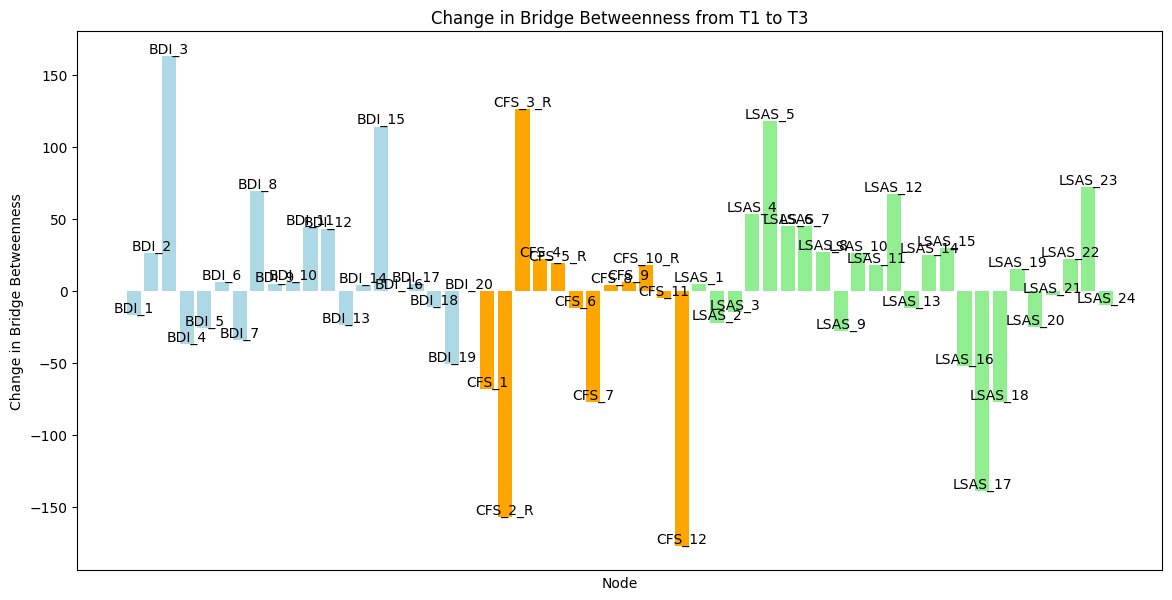

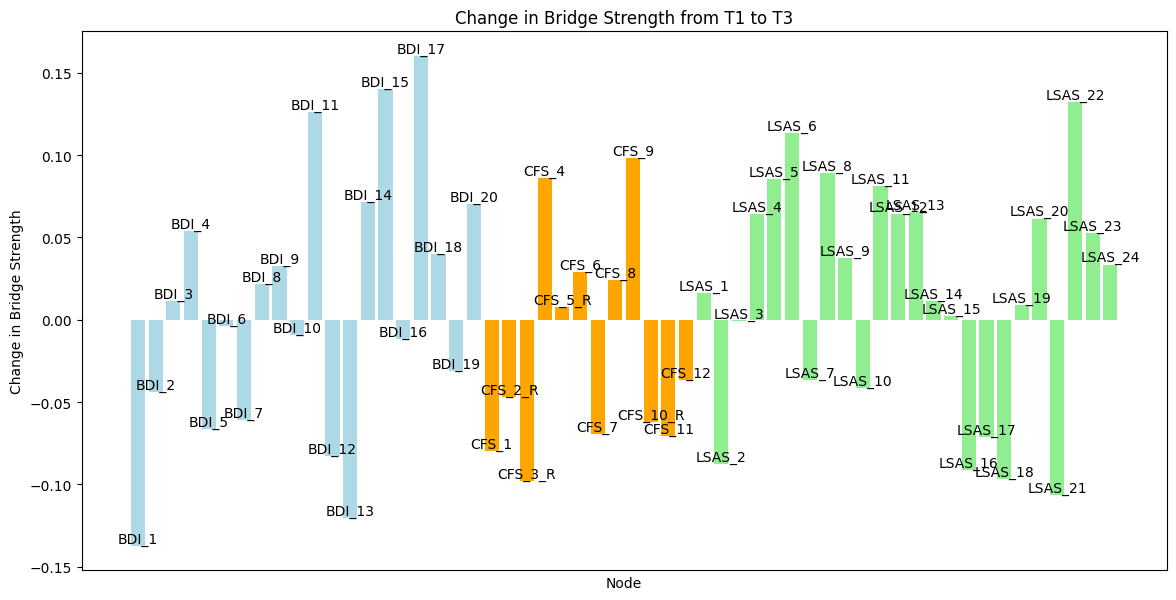

In [21]:
import matplotlib.pyplot as plt

# Define the color mapping
color_mapping = {'LSA': 'lightgreen', 'CFS': 'orange', 'BDI': 'lightblue'}
colors = df_diff['Scale'].map(color_mapping)

# Plot the change in bridge betweenness
plt.figure(figsize=(14, 7))
bars = plt.bar(df_diff['Node'], df_diff['Bridge_Betweenness'], color=colors)
plt.xlabel('Node')
plt.ylabel('Change in Bridge Betweenness')
plt.title('Change in Bridge Betweenness from T1 to T3')
plt.xticks([])  # Remove x-axis labels

# Annotate bars with node names
for bar, node in zip(bars, df_diff['Node']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, node, ha='center', va='bottom', rotation=0)

plt.show()

# Plot the change in bridge strength
plt.figure(figsize=(14, 7))
bars = plt.bar(df_diff['Node'], df_diff['Bridge_Strength'], color=colors)
plt.xlabel('Node')
plt.ylabel('Change in Bridge Strength')
plt.title('Change in Bridge Strength from T1 to T3')
plt.xticks([])  # Remove x-axis labels

# Annotate bars with node names
for bar, node in zip(bars, df_diff['Node']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, node, ha='center', va='bottom', rotation=0)

plt.show()